# Mistral OCR

- Image is encoded as base64
- Model is chosen to be "mistral-ocr-latest"
- Client is initiated with the generated API Key from Mistral
- Image is sent to Mistral API with the "image_url" Tag - Images are included for testing
- In case of PDF with many pages, for loop iterates through each page and prints markdown and images

[OCRImageObject(id='img-0.jpeg', top_left_x=21, top_left_y=447, bottom_right_x=588, bottom_right_y=811, image_base64='')]
System Design 1: Lecture

- allocate safety requirements to a system
- develop a suitable system architecture using the allservice strategy
- develop a suitable platform management software for the architecture

System Design 2: Lab course

- actually program redundancy mechanisms
- demspntrate deep understanding of the all active architecture
- show properties of this architecture


# Why is system development so complex? 

![img-0.jpeg](img-0.jpeg)

Number of aviation related fatalities have drastically decreased

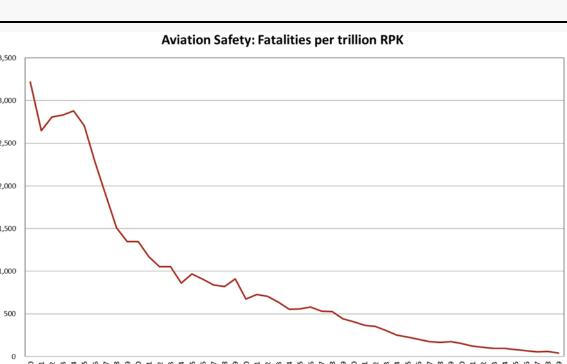

In [ ]:
import base64
import requests
import os
from mistralai import Mistral
import time

def encode_image(image_path):
    """Encode the image to base64."""
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  # Added general exception handling
        print(f"Error: {e}")
        return None

# Path to your image
image_path = "images/testcase0.png"

# Getting the base64 string
base64_image = encode_image(image_path)

model="mistral-ocr-latest"

client = Mistral(api_key="0jnBAkm49aKYT6e2FctUZumdsiVI3fzK")

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/png;base64,{base64_image}" 
    },
    include_image_base64=True,
)
for page in ocr_response.pages:
  print(page.images)
  print(page.markdown)